In [63]:
from tensorflow.keras.datasets import reuters
import ssl
import numpy as np

ssl._create_default_https_context = ssl._create_unverified_context

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [64]:
len(train_data)

8982

In [65]:
len(test_data)

2246

In [66]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [67]:
train_labels[10]

3

In [68]:
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

In [69]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [70]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [71]:
import keras
import keras.layers as layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [72]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [73]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.2807 - loss: 3.2272 - val_accuracy: 0.5920 - val_loss: 1.9463
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6380 - loss: 1.7369 - val_accuracy: 0.6800 - val_loss: 1.4044
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7308 - loss: 1.2160 - val_accuracy: 0.7320 - val_loss: 1.2011
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7869 - loss: 0.9822 - val_accuracy: 0.7730 - val_loss: 1.0836
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8275 - loss: 0.8215 - val_accuracy: 0.7960 - val_loss: 1.0201
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8614 - loss: 0.6625 - val_accuracy: 0.8030 - val_loss: 0.9674
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8835 - loss: 0.5592 - val_accuracy: 0.8040 - val_loss: 0.9215
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9062 - loss: 0.4708 - val_accuracy: 0.8040 - v

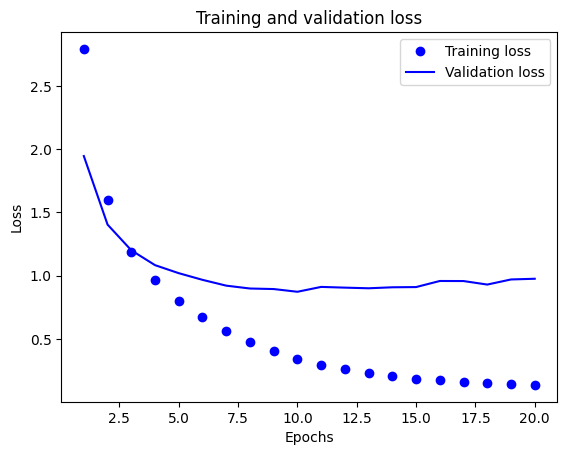

In [74]:
from matplotlib import pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

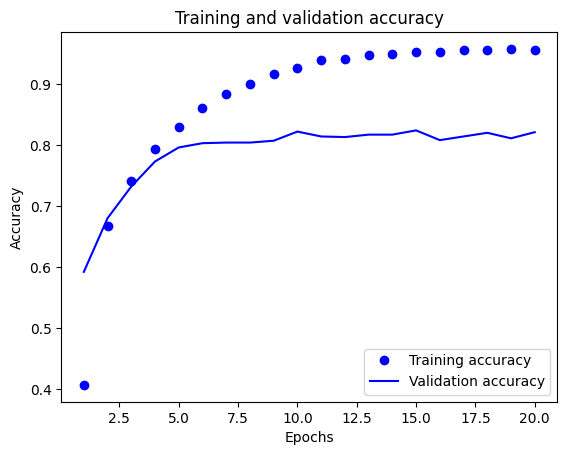

In [75]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [76]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
    ])
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)
results


Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4118 - loss: 3.0474
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6680 - loss: 1.5343
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7526 - loss: 1.1444
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8021 - loss: 0.9284
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8446 - loss: 0.7462
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8753 - loss: 0.6157
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8939 - loss: 0.5146
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9139 - loss: 0.4147
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9244 - loss: 0.3567
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8061 - loss: 0.8932


[0.9124758243560791, 0.7956367135047913]

In [77]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy) 
hits_array.mean()

0.188780053428317

In [78]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(46,)

In [79]:
np.sum(predictions[0])

0.9999998

In [80]:
np.argmax(predictions[0])

3

In [81]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3233 - loss: 3.4938 - val_accuracy: 0.3680 - val_loss: 2.7619
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3498 - loss: 2.6297 - val_accuracy: 0.3560 - val_loss: 2.3791
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3522 - loss: 2.3257 - val_accuracy: 0.3820 - val_loss: 2.1972
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3810 - loss: 2.0854 - val_accuracy: 0.4080 - val_loss: 1.9596
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4257 - loss: 1.8039 - val_accuracy: 0.4250 - val_loss: 1.8207
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4402 - loss: 1.6944 - val_accuracy: 0.4540 - val_loss: 1.7381
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5604 - loss: 1.5108 - val_accuracy: 0.6470 - val_loss: 1.5739
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6684 - loss: 1.3199 - val_accuracy: 0.6540 - v